In [110]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

['cell_images']


**Invected Images**

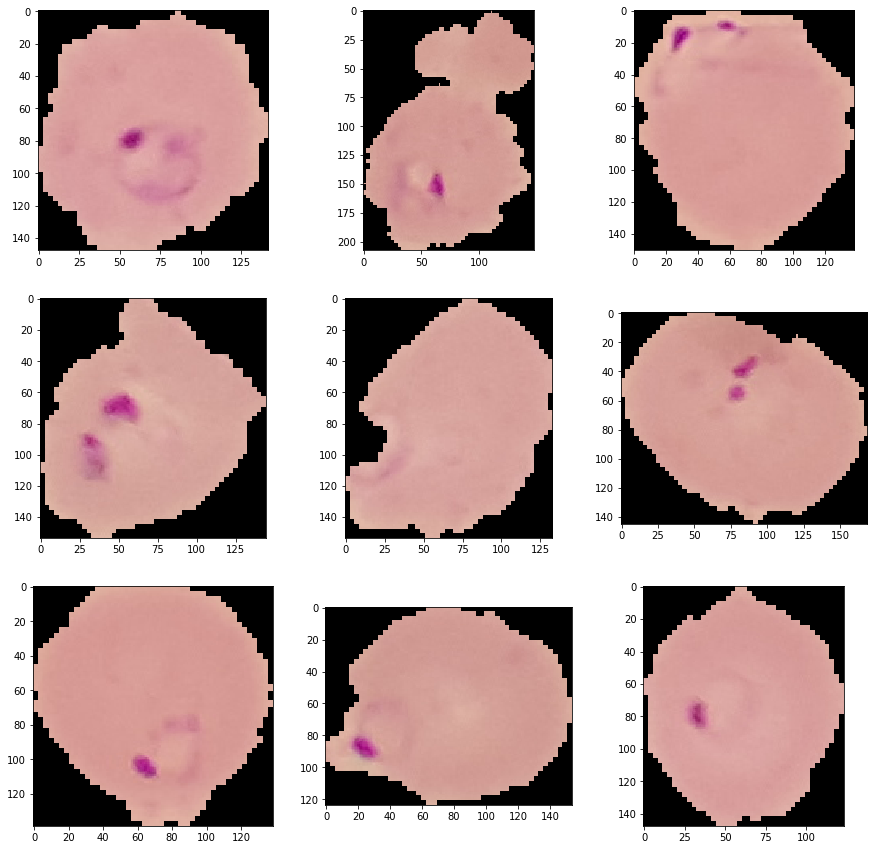

In [31]:
im_list = [162+i for i in range(9)]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i in enumerate(im_list):
    img = plt.imread("../input/cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_"+str(i[1])+".png")
    ax=axes[i[0]//3,i[0]%3]
    ax.imshow(img)           

**UnInfected Image**

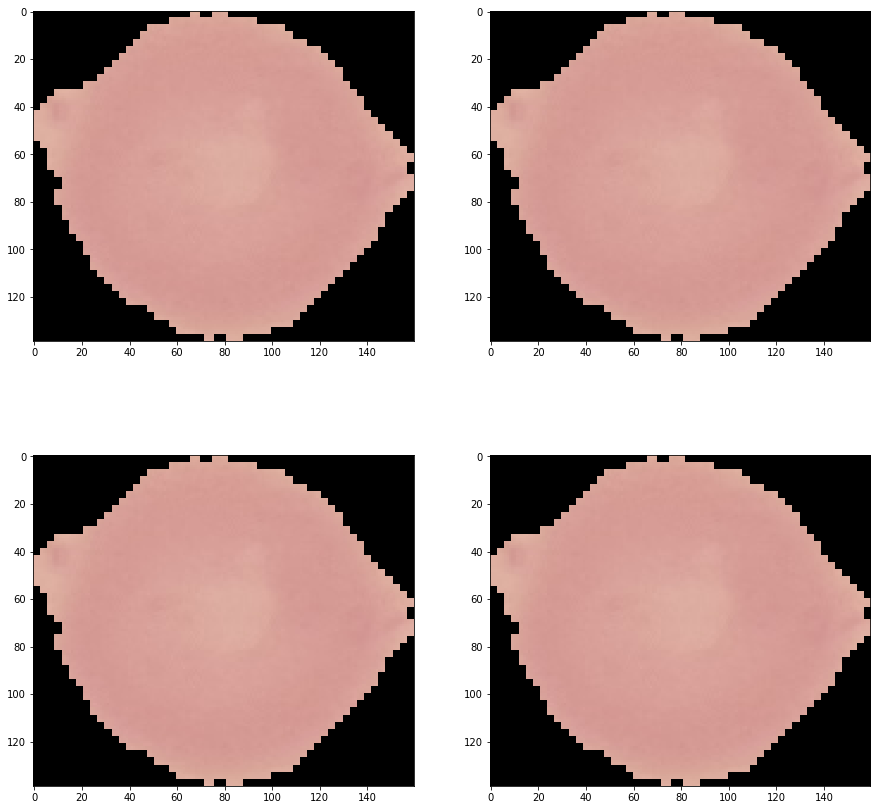

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
img1 = plt.imread("../input/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
img2 = plt.imread("../input/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
img3 = plt.imread("../input/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
img4 = plt.imread("../input/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")

ax = axes[0,0]
ax1 = axes[0,1]
ax2 = axes[1,0]
ax3 = axes[1,1]

ax.imshow(img1)
ax1.imshow(img2)
ax2.imshow(img3)
ax3.imshow(img4)

In [41]:
classifier = Sequential()

In [42]:
#Adding 1st Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3),input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding 2nd Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3),activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding 3rd Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding 4th Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Flattening
classifier.add(Flatten())

classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
parasite_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
uninfected_datagen = ImageDataGenerator(rescale=1./255)
parasite_data = parasite_datagen.flow_from_directory('../input/cell_images/cell_images',
                                                     target_size=(64,64),
                                                     batch_size=32,
                                                     class_mode = 'binary')
uninfected_data = uninfected_datagen.flow_from_directory('../input/cell_images/cell_images',
                                                        target_size=(64,64),
                                                        batch_size=32,
                                                        class_mode = 'binary')

Found 27558 images belonging to 2 classes.
Found 27558 images belonging to 2 classes.


In [44]:
accuracies = classifier.fit_generator(parasite_data,
                         steps_per_epoch = 100,
                         epochs = 30,
                         validation_data = uninfected_data,
                         validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 28s 277ms/step - loss: 0.6822 - acc: 0.5469 - val_loss: 0.6384 - val_acc: 0.6425
Epoch 2/30
100/100 [==============================] - 25s 251ms/step - loss: 0.5508 - acc: 0.7556 - val_loss: 0.3445 - val_acc: 0.8631
Epoch 3/30
100/100 [==============================] - 25s 250ms/step - loss: 0.2550 - acc: 0.9097 - val_loss: 0.2046 - val_acc: 0.9369
Epoch 4/30
100/100 [==============================] - 26s 256ms/step - loss: 0.2260 - acc: 0.9309 - val_loss: 0.2013 - val_acc: 0.9444
Epoch 5/30
100/100 [==============================] - 25s 252ms/step - loss: 0.1909 - acc: 0.9403 - val_loss: 0.1396 - val_acc: 0.9613
Epoch 6/30
100/100 [==============================] - 24s 243ms/step - loss: 0.1784 - acc: 0.9447 - val_loss: 0.1547 - val_acc: 0.9537
Epoch 7/30
100/100 [==============================] - 23s 235ms/step - loss: 0.1686 - acc: 0.9437 - val_loss: 0.1371 - val_acc: 0.9619
Epoch 8/30
100/100 [==============================] - 2

In [101]:
acc = pd.DataFrame.from_dict(accuracies.history)
acc = pd.concat([pd.Series(range(0,30),name='epochs'),acc],axis=1)
acc.head()

,epochs,val_loss,val_acc,loss,acc
0,0,0.638394,0.642500,0.682183,0.546875
1,1,0.344495,0.863125,0.550810,0.755625
2,2,0.204616,0.936875,0.255033,0.909687
3,3,0.201313,0.944375,0.225987,0.930937
4,4,0.139610,0.961250,0.190940,0.940312


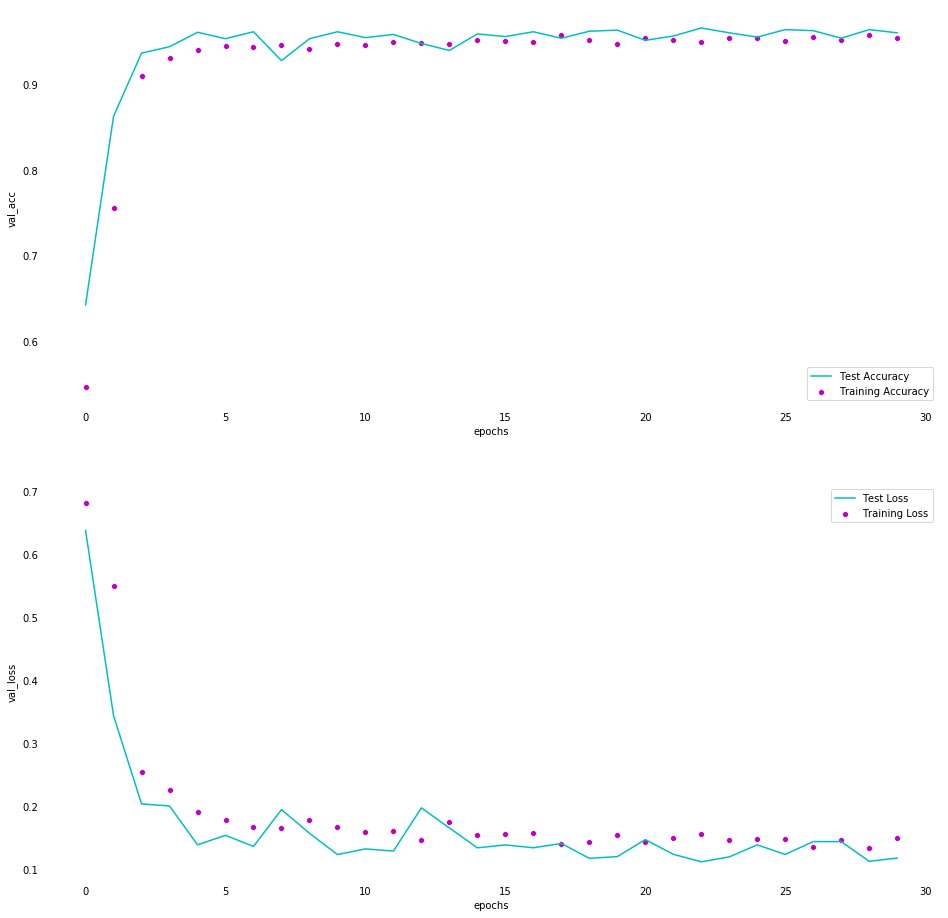

In [111]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(16,16))
sns.scatterplot(x='epochs',y='acc',data=acc,ax=ax,color='m')
sns.lineplot(x='epochs',y='val_acc',data=acc,ax=ax,color='c')
sns.scatterplot(x='epochs',y='loss',data=acc,ax=ax1,color='m')
sns.lineplot(x='epochs',y='val_loss',data=acc,ax=ax1,color='c')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])